In [603]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

### Exploratory Data Analysis

**Se cargan los datos de parkinson dataset que contiene grabaciones de voz de 31 participantes, dentro de los cuales 23 presentan la enfermedad**


In [604]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [605]:
parkinson_vocal = pd.read_csv('/content/drive/MyDrive/datasets/parkinsons.data')

In [606]:
parkinson_vocal.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [607]:
parkinson_vocal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [608]:
parkinson_vocal.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


The target variable is status, in which 1 represents that the participant has parkinson and 0 that they don't

In [609]:
parkinson_vocal.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [610]:
parkinson_vocal.shape

(195, 24)

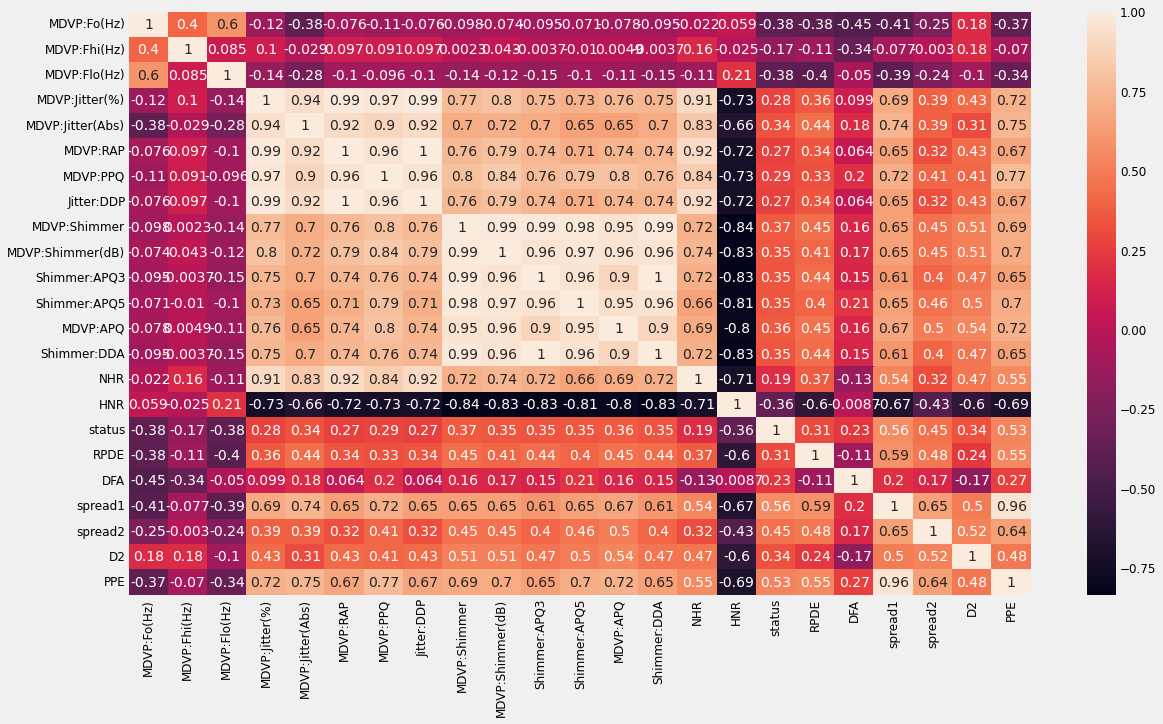

In [611]:
plt.figure(figsize=(18, 10))
sns.heatmap(parkinson_vocal.corr(), annot=True)

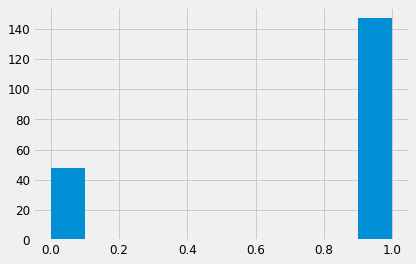

In [612]:
parkinson_vocal.status.hist()

Parece que hay problemas de colinealidad con algunas variables. Ya que tiene muy pocos atributos vamos a aplicar naive bayes para ignorar la clara colinealidad entre las variables.

In [616]:
X = parkinson_vocal[[col for col in parkinson_vocal.columns if col != 'status']]

In [617]:
columns_ = list(X.columns)
columns_

['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

KeyError: ignored

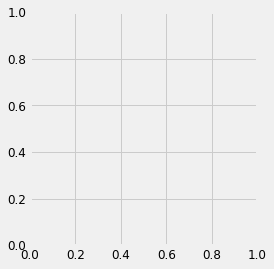

In [621]:
for col in columns_:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    fig = parkinson_vocal.boxplot(column=col)
    fig.set_ylabel(col)
    
    plt.subplot(1, 2, 2)
    fig = parkinson_vocal[col].hist(bins=20)
    fig.set_ylabel(col)
    

### Naive bayes

In [622]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split

**Spliting the data**

In [623]:
parkinson_vocal.drop('name', axis=1, inplace=True)

In [624]:
parkinson_vocal.head(2) 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [626]:
y = parkinson_vocal.status

In [627]:
X = parkinson_vocal[[col for col in parkinson_vocal.columns if col != 'status']]

### Testing with Robust Scaler

In [628]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import LocalOutlierFactor

In [629]:
X_r = RobustScaler().fit_transform(X)

In [630]:
X_r

array([[-0.44170744, -0.20736935, -0.52609573, ...,  0.45380827,
        -0.11183061,  0.78423599],
       [-0.40477323, -0.30420962,  0.17054417, ...,  1.11271077,
         0.23323262,  1.51149928],
       [-0.49247665, -0.50052047,  0.1299179 , ...,  0.87990961,
        -0.03586806,  1.19954297],
       ...,
       [ 0.39722687,  0.71831033, -0.5388363 , ..., -0.57618214,
         0.59226119, -0.53946628],
       [ 0.76650766,  2.47509038, -0.52776457, ..., -0.10898759,
        -0.41487316, -0.61236573],
       [ 1.00463211,  0.94521115, -0.47269302, ..., -0.26904136,
         0.36094173, -0.39369336]])

In [631]:
df_scaler = pd.DataFrame(X_r, columns=X.columns)

In [632]:
df_scaler.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.441707,-0.207369,-0.526096,0.742638,1.00,0.551724,1.360382,0.552147,0.971469,1.017370,0.751248,1.392969,0.701593,0.751248,0.530053,-0.178988,-0.488228,1.06780,0.646652,0.453808,-0.111831,0.784236
1,-0.404773,-0.304210,0.170544,1.213828,1.25,0.988506,2.038186,0.989264,1.794668,2.009926,1.543261,2.477344,1.557598,1.543816,0.387015,-0.510421,-0.226126,1.11642,1.172214,1.112711,0.233233,1.511499


### Outliers

In [417]:
ls = LocalOutlierFactor(n_neighbors=2)

In [429]:
y_pred = ls.fit_predict(df_scaler) # predice outliers

In [451]:
y_pred

array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [467]:
lof_index = np.where(y_pred==1)

In [471]:
lst_i = [i for i in lof_index[0]]

In [474]:
df_scaler = df_scaler.iloc[lst_i, :]

### Scaling

In [583]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(df_scaler, y, test_size=0.2)

**Aplicando GaussianNB model**

In [633]:
gnb = GaussianNB()

In [634]:
gnb.fit(X_train_r, y_train_r)

GaussianNB(priors=None, var_smoothing=1e-09)

In [635]:
y_pred_r = gnb.predict(X_test_r)

In [636]:
df = pd.DataFrame({'actual':y_test_r, 'predicted':y_pred_r})

In [637]:
df.head()

,actual,predicted
142,1,1
70,1,1
160,1,1
98,1,1
62,0,0


In [638]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [639]:
metrics.confusion_matrix(y_test_r, y_pred_r) #Really bad performance

array([[ 8,  1],
       [11, 19]])

In [640]:
print(classification_report(y_test_r, y_pred_r))

              precision    recall  f1-score   support

           0       0.42      0.89      0.57         9
           1       0.95      0.63      0.76        30

    accuracy                           0.69        39
   macro avg       0.69      0.76      0.67        39
weighted avg       0.83      0.69      0.72        39



In [641]:
print(accuracy_score(y_pred_r, y_test_r))

0.6923076923076923


## SVM

In [642]:
from sklearn.svm import LinearSVC

In [644]:
clf = LinearSVC(random_state=0)
clf.fit(X_train_r, y_train_r)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [645]:
y_pred = clf.predict(X_test_r)

In [646]:
print(accuracy_score(y_pred, y_test_r))

0.8974358974358975


In [647]:
metrics.confusion_matrix(y_test_r, y_pred)

array([[ 7,  2],
       [ 2, 28]])

In [648]:
print(classification_report(y_test_r, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.93      0.93      0.93        30

    accuracy                           0.90        39
   macro avg       0.86      0.86      0.86        39
weighted avg       0.90      0.90      0.90        39



In [649]:
clf.score(X_test_r, y_test_r)

0.8974358974358975

In [650]:
 from sklearn.model_selection import GridSearchCV

In [654]:
from sklearn.svm import SVC

In [661]:
grid_search = GridSearchCV(SVC, {
    'gamma': ['auto', 'scale'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'C':[1, 10, 20]
}, cv=5, scoring='accuracy')

In [662]:
grid_search.fit(X_train_r, y_train_r)

TypeError: ignored